## Introduction
In today’s digital world, users are overwhelmed with the abundance of movie choices available across various platforms. As a result, deciding what to watch next has become increasingly difficult. Movie Recommendation Systems offer a practical solution to this issue by helping users discover movies tailored to their preferences, based on data and intelligent algorithms.

This project aims to build a Content-Based Movie Recommendation System that suggests similar movies to a given title using various metadata features such as genre, overview, cast, crew, and keywords. The recommendations are based on the similarity between movies, allowing the system to offer personalized suggestions without the need for explicit user ratings or interaction history.

## Technologies and Tools Used
This project leverages the following tools and technologies:
Python: Core programming language used for data processing and model development
Pandas: For data cleaning, exploration, and manipulation of movie metadata
NumPy: For numerical operations and efficient array handling
Scikit-learn: For feature extraction (e.g., TF-IDF Vectorization) and similarity measurement using cosine similarity
Natural Language Processing (NLP): To process and vectorize text data such as movie overviews and keywords
Jupyter Notebook: For interactive development and visualization
Matplotlib/Seaborn (optional): For data visualization and understanding patterns

## Data Descriptions

#### All the features in the data set are defined as follows:

1. adult : Indicates whether the movie is for adults (True or False).
2. belongs_to_collection : Contains information about the collection or franchise the movie belongs to (if any), represented as a dictionary-like string.
3. budget : The budget of the movie in USD (as a string or numeric value).
4. genres : A list of genre objects (each with id and name) associated with the movie.
5. homepage : The official website URL of the movie (if available).
4. id : The unique identifier for the movie (may be numeric or string).
5. imdb_id : The IMDb identifier of the movie (e.g., tt0114709).
6. original_language : The original language in which the movie was produced (e.g., 'en' for English).
7. original_title : The original title of the movie (before translation/localization).
8. overview : A short summary or synopsis of the movie's plot.
9. popularity : A numeric score representing the movie's popularity (used for sorting or filtering).
10. poster_path : The file path to the movie’s poster image.
11. production_companies : A list of production companies involved in making the movie, usually as dictionary-like strings.
12. production_countries : A list of countries involved in production, also in dictionary-like format.
13. release_date : The official release date of the movie (in YYYY-MM-DD format).
14. revenue : The revenue generated by the movie (in USD).
15. runtime : The length of the movie in minutes.
16. spoken_languages : A list of spoken languages in the movie, represented as dictionaries.
17. status : The release status of the movie (e.g., Released, Post Production).
18. tagline : A short marketing tagline or catchphrase for the movie.
19. title : The title of the movie (may differ from the original title due to localization).
20. video : Indicates whether the entry is a video (True or False).
21. vote_average : The average user rating for the movie (on a scale, typically out of 10).
22. vote_count : The total number of votes or ratings the movie has received.

In [8]:
# Installing neccessary libraries here
! pip install pandas
! pip install numpy
! pip install scikit-learn
! pip install matplotlib
! pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [9]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import ast  # for parsing genre strings
from sklearn.preprocessing import MultiLabelBinarizer, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# Load the movie metadata CSV file
df = pd.read_csv("movies_metadata.csv", low_memory=False)
df

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [11]:
df['original_title'].head(50)

0                            Toy Story
1                              Jumanji
2                     Grumpier Old Men
3                    Waiting to Exhale
4          Father of the Bride Part II
5                                 Heat
6                              Sabrina
7                         Tom and Huck
8                         Sudden Death
9                            GoldenEye
10              The American President
11         Dracula: Dead and Loving It
12                               Balto
13                               Nixon
14                    Cutthroat Island
15                              Casino
16               Sense and Sensibility
17                          Four Rooms
18      Ace Ventura: When Nature Calls
19                         Money Train
20                          Get Shorty
21                             Copycat
22                           Assassins
23                              Powder
24                   Leaving Las Vegas
25                       

In [12]:
#checking all the columns from datasets
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [13]:
# We only need title, genres, vote_average, and popularity for this project
movies = df[['title', 'genres', 'vote_average', 'popularity']].copy()
movies

,title,genres,vote_average,popularity
0,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",7.7,21.946943
1,Jumanji,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",6.9,17.015539
2,Grumpier Old Men,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",6.5,11.7129
3,Waiting to Exhale,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",6.1,3.859495
4,Father of the Bride Part II,"[{'id': 35, 'name': 'Comedy'}]",5.7,8.387519
...,...,...,...,...
45461,Subdue,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",4.0,0.072051
45462,Century of Birthing,"[{'id': 18, 'name': 'Drama'}]",9.0,0.178241
45463,Betrayal,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",3.8,0.903007
45464,Satan Triumphant,[],0.0,0.003503


In [14]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         45460 non-null  object 
 1   genres        45466 non-null  object 
 2   vote_average  45460 non-null  float64
 3   popularity    45461 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.4+ MB


In [15]:
# Drop rows with missing values in important columns
movies = movies.dropna(subset=['genres', 'vote_average', 'popularity'])

In [16]:
#Extract genre names from JSON-like string
def parse_genres(genre_str):
    """Converts a string of genre dictionaries into a list of genre names."""
    try:
        genres = ast.literal_eval(genre_str)
        return [g['name'] for g in genres]
    except:
        return []

# Apply the parsing function to each row
movies['genre_list'] = movies['genres'].apply(parse_genres)




C:\Users\mdeep\AppData\Local\Temp\ipykernel_17220\2108077361.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['genre_list'] = movies['genres'].apply(parse_genres)


C:\Users\mdeep\AppData\Local\Temp\ipykernel_17220\533219994.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')


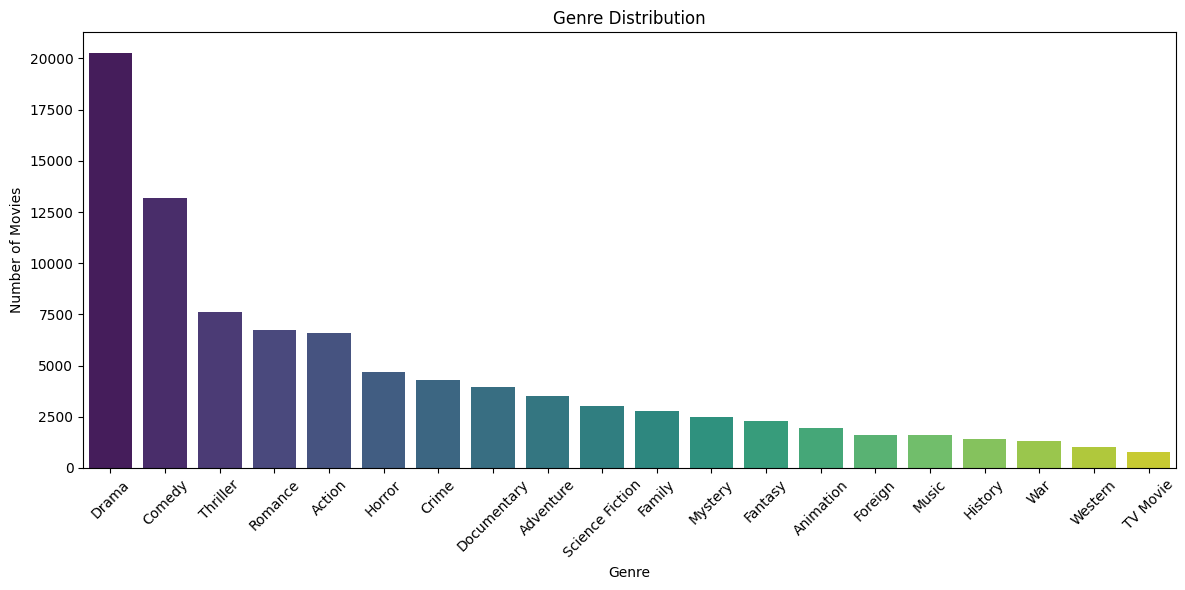

In [17]:
genre_counts = movies['genre_list'].explode().value_counts().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.title('Genre Distribution')
plt.xticks(rotation=45)
plt.ylabel('Number of Movies')
plt.xlabel('Genre')
plt.tight_layout()
plt.show()

In [18]:
# This turns genre lists into binary features
mlb = MultiLabelBinarizer()
genre_encoded = mlb.fit_transform(movies['genre_list'])
genre_df = pd.DataFrame(genre_encoded, columns=mlb.classes_)
genre_df

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45455,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
45456,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
45457,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
45458,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
# We scale vote_average and popularity to range [0, 1]
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(movies[['vote_average', 'popularity']])
scaled_df = pd.DataFrame(scaled_features, columns=['vote_average', 'popularity'])
scaled_df

,vote_average,popularity
0,0.77,0.040087
1,0.69,0.031079
2,0.65,0.021394
3,0.61,0.007049
4,0.57,0.015320
...,...,...
45455,0.40,0.000132
45456,0.90,0.000326
45457,0.38,0.001649
45458,0.00,0.000006


In [20]:
#Combine all features into one matrix
final_features = pd.concat([genre_df, scaled_df], axis=1)
final_features

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,...,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,vote_average,popularity
0,0,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0.77,0.040087
1,0,1,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0.69,0.031079
2,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0.65,0.021394
3,0,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0.61,0.007049
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.57,0.015320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45455,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0.40,0.000132
45456,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0.90,0.000326
45457,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0.38,0.001649
45458,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.00,0.000006


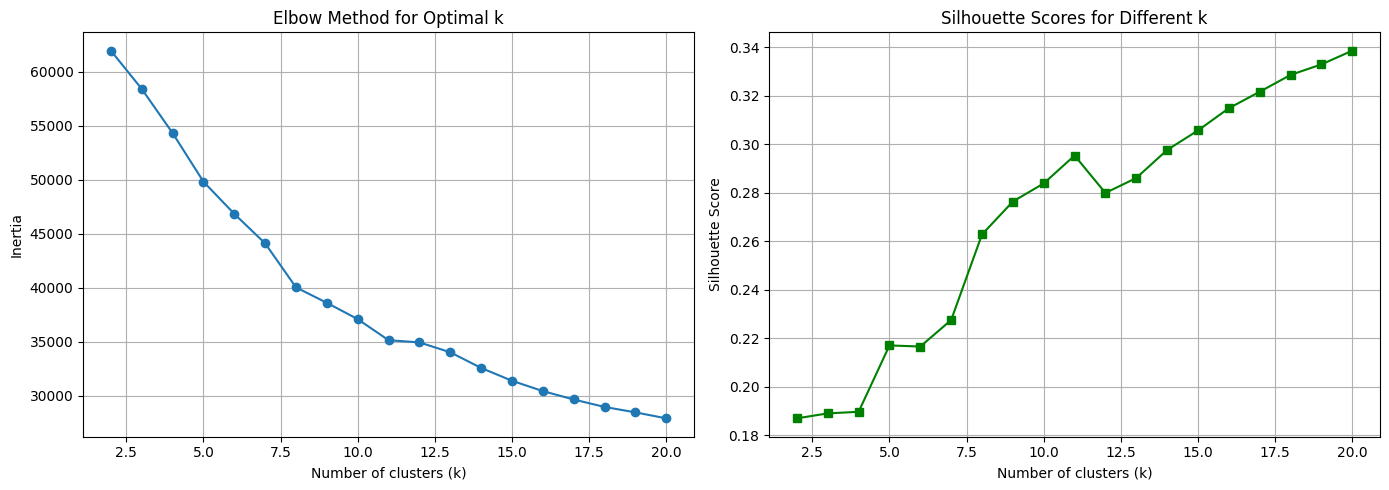

In [21]:
inertia_values = []
silhouette_scores = []
k_values = range(2, 21)

for k in k_values:
    kmeans_model = KMeans(n_clusters=k, random_state=42)
    kmeans_model.fit(final_features)
    inertia_values.append(kmeans_model.inertia_)
    silhouette_scores.append(silhouette_score(final_features, kmeans_model.labels_))

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].plot(k_values, inertia_values, marker='o')
axs[0].set_title('Elbow Method for Optimal k')
axs[0].set_xlabel('Number of clusters (k)')
axs[0].set_ylabel('Inertia')
axs[0].grid(True)

axs[1].plot(k_values, silhouette_scores, marker='s', color='green')
axs[1].set_title('Silhouette Scores for Different k')
axs[1].set_xlabel('Number of clusters (k)')
axs[1].set_ylabel('Silhouette Score')
axs[1].grid(True)

plt.tight_layout()
plt.show()

C:\Users\mdeep\AppData\Local\Temp\ipykernel_17220\2550356348.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['cluster'] = kmeans.fit_predict(final_features)
C:\Users\mdeep\AppData\Local\Temp\ipykernel_17220\2550356348.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=movies['cluster'], palette='coolwarm')


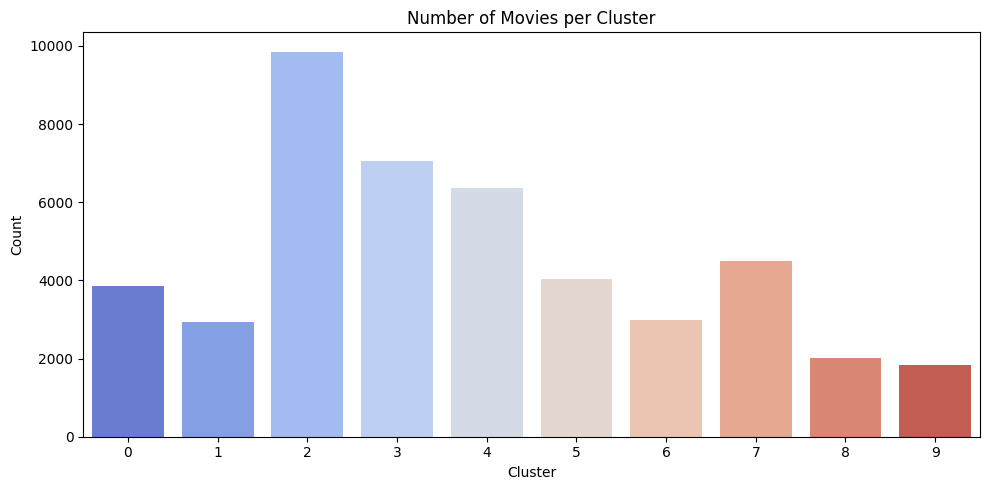

In [22]:
# Fit KMeans using chosen k (replace with optimal k from elbow plot)
optimal_k = 10
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
movies['cluster'] = kmeans.fit_predict(final_features)

# Plot how many movies per cluster
plt.figure(figsize=(10, 5))
sns.countplot(x=movies['cluster'], palette='coolwarm')
plt.title('Number of Movies per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [23]:
#Define recommendation function
def recommend_movies(movie_title, n=5):
    """
    Recommend similar movies based on genre, popularity, and rating using clustering.
    
    Parameters:
        movie_title (str): Title of the movie to base recommendations on.
        n (int): Number of similar movies to return.
        
    Returns:
        pd.DataFrame: Top N recommended movies in the same cluster.
    """
    # Lowercase comparison for robust matching
    target = movies[movies['title'].str.lower() == movie_title.lower()]
    
    if target.empty:
        return f" Movie titled '{movie_title}' not found in dataset."
    
    # Get the cluster of the target movie
    cluster_id = target['cluster'].values[0]
    
    # Get all movies from the same cluster
    similar_movies = movies[(movies['cluster'] == cluster_id) & 
                            (movies['title'].str.lower() != movie_title.lower())]
    
    # Return top N based on vote_average and popularity
    return similar_movies[['title', 'vote_average', 'popularity']].sort_values(
        by=['vote_average', 'popularity'], ascending=False).head(n)


# Example usage:
movie_title = "Friday"

print(" Recommended movies similar to", movie_title,":")
print(recommend_movies(movie_title, n=5))

 Recommended movies similar to Friday :
                                title  vote_average popularity
30288                   Backyard Dogs          10.0     0.9854
43473                         Firefly          10.0   0.957019
2653                 Stiff Upper Lips          10.0   0.882132
21408                   Growing Pains          10.0   0.853913
42612  Stephen Lynch: Hello Kalamazoo          10.0   0.724499
